In [819]:
import pandas as pd
passenger=pd.read_csv("train.csv")
passenger.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [820]:
passenger.groupby("Survived").count()["PassengerId"]

Survived
0    549
1    342
Name: PassengerId, dtype: int64

In [821]:
passenger.groupby("Pclass").count()["PassengerId"]

Pclass
1    216
2    184
3    491
Name: PassengerId, dtype: int64

In [822]:
passenger.groupby("Sex").count()["PassengerId"]

Sex
female    314
male      577
Name: PassengerId, dtype: int64

In [823]:
passenger.groupby("Age").count()["PassengerId"]

Age
0.42     1
0.67     1
0.75     2
0.83     2
0.92     1
        ..
70.00    2
70.50    1
71.00    2
74.00    1
80.00    1
Name: PassengerId, Length: 88, dtype: int64

In [824]:
passenger.groupby("SibSp").count()["PassengerId"]

SibSp
0    608
1    209
2     28
3     16
4     18
5      5
8      7
Name: PassengerId, dtype: int64

In [825]:
passenger.groupby("Parch").count()["PassengerId"]

Parch
0    678
1    118
2     80
3      5
4      4
5      5
6      1
Name: PassengerId, dtype: int64

In [826]:
passenger.groupby("Fare").count()["PassengerId"]

Fare
0.0000      15
4.0125       1
5.0000       1
6.2375       1
6.4375       1
            ..
227.5250     4
247.5208     2
262.3750     2
263.0000     4
512.3292     3
Name: PassengerId, Length: 248, dtype: int64

In [827]:
passenger.groupby("Embarked").count()["PassengerId"]

Embarked
C    168
Q     77
S    644
Name: PassengerId, dtype: int64

In [828]:
passenger_clustering=passenger[["Survived","Pclass","Sex","Age","SibSp","Parch","Fare","Embarked"]]
passenger_clustering.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [829]:
sex_d=passenger["Sex"].map({"male":1,"female":0})
emb_d=passenger["Embarked"].map({"S":2,"C":1,"Q":0})
passenger_clustering=passenger_clustering.assign(Sex=sex_d,Embarked=emb_d)

In [830]:
passenger_clustering.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [831]:
passenger_clustering=passenger_clustering.dropna()

In [832]:
passenger_clustering.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [833]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler 
sc=StandardScaler()
passenger_clustering_sc=sc.fit_transform(passenger_clustering)
kmeans=KMeans(n_clusters=4,random_state=0)
clusters=kmeans.fit(passenger_clustering_sc)
passenger_clustering["cluster"]=clusters.labels_
print(passenger_clustering["cluster"].unique())
passenger_clustering.head()
#32

[1 2 0 3]


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,cluster
0,0,3,1,22.0,1,0,7.2500,2.0,1
1,1,1,0,38.0,1,0,71.2833,1.0,2
2,1,3,0,26.0,0,0,7.9250,2.0,0
3,1,1,0,35.0,1,0,53.1000,2.0,2
4,0,3,1,35.0,0,0,8.0500,2.0,1


In [834]:
passenger_clustering.groupby("cluster").count()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
cluster,,,,,,,,
0,179,179,179,179,179,179,179,179
1,346,346,346,346,346,346,346,346
2,142,142,142,142,142,142,142,142
3,45,45,45,45,45,45,45,45


In [835]:
#cluster1が一番生存者が多い、3が一番少ない

In [836]:
passenger_clustering.groupby("cluster").mean()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
cluster,,,,,,,,
0,0.798883,2.525140,0.167598,21.937151,0.452514,0.564246,16.814782,1.703911
1,0.063584,2.508671,0.979769,32.414740,0.219653,0.086705,15.671264,1.852601
2,0.830986,1.007042,0.429577,37.020563,0.521127,0.500000,102.051264,1.492958
3,0.111111,2.933333,0.511111,15.688889,3.000000,2.355556,37.522222,1.777778


In [837]:
from sklearn.decomposition import PCA
X=passenger_clustering_sc
pca=PCA(n_components=2)
pca.fit(X)
x_pca=pca.transform(X)
pca_df=pd.DataFrame(x_pca)
pca_df["cluster"]=passenger_clustering["cluster"]

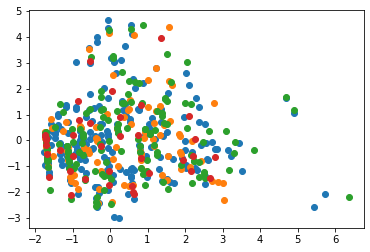

In [838]:
import matplotlib.pyplot as plt
%matplotlib inline
for i in passenger_clustering["cluster"].unique():
    tmp=pca_df.loc[pca_df["cluster"]==i]
    plt.scatter(tmp[0],tmp[1],)

In [839]:
passenger1=passenger[["Survived","Pclass","Sex","Age","SibSp","Parch","Fare","Embarked"]]
predict_data=passenger1
predict_data=pd.get_dummies(predict_data)
del predict_data["Sex_female"]
del predict_data["Embarked_C"]
predict_data=predict_data.dropna()

In [840]:
from sklearn.tree import DecisionTreeClassifier
import sklearn.model_selection

survive=predict_data.loc[predict_data["Survived"]==1]
dead=predict_data.loc[predict_data["Survived"]==0]

X=pd.concat([survive,dead],ignore_index=True)
y=X["Survived"]
del X["Survived"]
X_train,X_test,y_train,y_test=sklearn.model_selection.train_test_split(X,y)
model=DecisionTreeClassifier(random_state=0)
model.fit(X_train,y_train)
y_test_pred=model.predict(X_test)
print(y_test_pred)

[0 1 0 0 1 0 1 0 0 1 1 1 1 1 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 0 0 0 0 0 1 0 0 1 0 1 0 1 1 0 0 0 1 1 0 0 1 0 0 0 1 1 0 0 1
 0 0 0 0 0 0 1 1 0 1 1 0 1 1 0 1 1 1 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 1 1
 1 0 0 1 1 0 1 1 1 1 0 1 0 0 1 0 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0
 0 0 1 0 0 0 1 0 1 1 1 1 0 1 1 0 1 0 1 0 0 0 0 0 1 1 0 1 0 1 0]


In [841]:
results_test=pd.DataFrame({"y_test":y_test,"y_pred":y_test_pred})
results_test.head()

,y_test,y_pred
478,0,0
124,1,1
460,0,0
587,0,0
164,1,1


In [842]:
correct=len(results_test.loc[results_test["y_test"]==results_test["y_pred"]])
data_count=len(results_test)
score_test=correct/data_count
print(score_test)

0.6983240223463687


In [843]:
print(model.score(X_test,y_test))
print(model.score(X_train,y_train))

0.6983240223463687
0.9925233644859813


In [844]:
#過学習

In [845]:
X=pd.concat([survive,dead],ignore_index=True)
y=X["Survived"]
del X["Survived"]
X_train,X_test,y_train,y_test=sklearn.model_selection.train_test_split(X,y)
model=DecisionTreeClassifier(random_state=0,max_depth=5)
model.fit(X_train,y_train)
y_test_pred=model.predict(X_test)
print(y_test_pred) 

[1 0 0 0 1 0 0 0 0 0 1 0 1 1 1 0 1 1 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 1 0
 0 0 0 0 0 1 1 0 0 0 0 0 1 1 0 0 1 1 1 1 1 0 0 0 1 1 0 1 1 1 1 1 1 0 0 0 1
 0 1 0 1 0 1 0 1 0 0 1 1 1 0 1 0 0 0 0 0 0 1 0 0 1 1 1 0 0 0 0 1 0 1 0 0 0
 1 0 0 1 1 0 1 1 0 1 1 1 0 1 1 0 0 0 0 1 0 1 0 1 1 0 1 0 0 1 1 0 0 0 1 1 1
 1 0 1 1 1 0 0 0 1 0 1 1 0 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0]


In [846]:
importance=pd.DataFrame({"feature_names":X.columns,"coefficient":model.feature_importances_ })
importance

,feature_names,coefficient
0,Pclass,0.209625
1,Age,0.131895
2,SibSp,0.099278
3,Parch,0.002309
4,Fare,0.079473
5,Sex_male,0.472762
6,Embarked_Q,0.000000
7,Embarked_S,0.004659


In [847]:

Sex="female"
Age=2
Pclass=3
SibSp=1
Parch=0
Fare=70
embarked_name="S"

In [848]:
if sex_male=="male":
    gender_list=[1]
else :
    gender_list=[0]
if embarked_name=="S":
    embarked_name_list=[1,0]
elif embarked_name=="C":
    embarked_name_list=[0,1]
else:
    embarked_name_list=[0,0]
input_data=[Age,Pclass,SibSp,Parch,Fare]
input_data.extend(gender_list)
input_data.extend(embarked_name_list)

In [849]:
print(model.predict([input_data]))
print(model.predict_proba([input_data]))

[1]
[[0. 1.]]


In [850]:
test=pd.read_csv("test.csv")
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [851]:
test["Age"]=test["Age"].fillna(test["Age"].mean())
test["Fare"]=test["Fare"].fillna(test["Fare"].mean())
test_features=test[["Pclass","Sex","Age","SibSp","Parch","Fare","Embarked"]]
test_features=pd.get_dummies(test_features)
del test_features["Sex_female"]
del test_features["Embarked_C"]
my_prediction=model.predict(test_features)
print(my_prediction)
my_prediction.shape
#test_features.index.name="PassengerId"
test_features

[0 1 0 0 1 0 1 0 1 0 0 1 1 0 1 1 0 0 1 1 0 1 1 1 1 0 1 0 1 0 0 0 0 0 1 0 1
 1 0 0 0 1 0 1 1 0 1 0 1 0 1 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 1 1 1 1 0 1 1
 1 1 0 1 0 1 1 0 1 0 0 0 1 1 1 1 0 0 1 0 1 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 1 1 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 1 0 1 0
 1 0 1 0 0 1 0 0 1 1 1 0 1 1 1 0 0 0 1 0 1 1 0 0 0 0 0 1 1 0 1 1 0 1 1 0 1
 0 1 0 0 0 0 1 1 0 1 0 1 1 0 1 0 1 1 1 0 0 1 0 1 0 0 0 0 0 1 1 1 0 1 0 1 0
 1 0 1 0 0 1 0 0 0 1 0 0 1 0 0 0 1 1 1 1 1 0 0 1 1 0 1 0 1 0 1 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 1 0 1 0 0 1 0 0 0 0 1 1 1 0 0 0 0 1 0 0 1 1 0 1 0 0
 1 0 1 0 0 0 0 0 1 1 1 1 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 1 1 0 1 1 0 0 1 1 0
 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 1 1 0 0 0 0 1 1 0 1 0 0 0 1 0
 0 1 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 1 0 0 1 0 1 0 0 1 0 1 1 1 0 0
 1 1 0 1 1 1 0 1 0 0 0]


,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,3,34.50000,0,0,7.8292,1,1,0
1,3,47.00000,1,0,7.0000,0,0,1
2,2,62.00000,0,0,9.6875,1,1,0
3,3,27.00000,0,0,8.6625,1,0,1
4,3,22.00000,1,1,12.2875,0,0,1
...,...,...,...,...,...,...,...,...
413,3,30.27259,0,0,8.0500,1,0,1
414,1,39.00000,0,0,108.9000,0,0,0
415,3,38.50000,0,0,7.2500,1,0,1
416,3,30.27259,0,0,8.0500,1,0,1


In [876]:
import numpy as np
PassengerId=np.array(test["PassengerId"]).astype(int)
my_solution=pd.DataFrame(my_prediction,PassengerId)
my_solution.columns=["Survived"]
my_solution.index.name="PassengerId"
my_solution.rename(columns={"0":"Survived"},inplace=True)
my_solution


,Survived
PassengerId,
892,0
893,1
894,0
895,0
896,1
...,...
1305,0
1306,1
1307,0


In [877]:
my_solution.to_csv("titanic_submit1")